# Molecule Fragmentation

This notebook is to understand how to decompose small molecules in to their building blocks using various algorithms.

This could prove useful in various tasks such as R-group replacement, scaffold hopping and molecule optimisation.

Contents:

[1. Simple decomposition using BRICS](#simple-brics-decomposition)

[2. Build a fragment library](#build-a-fragment-library-by-decomposing-multiple-molecules)

In [1]:
import os
import numpy as np
import pandas as pd
from rdkit import Chem, DataStructs
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import AllChem, BRICS, Descriptors, RDConfig, Draw

## Simple BRICS decomposition

Consider a sample molecule:

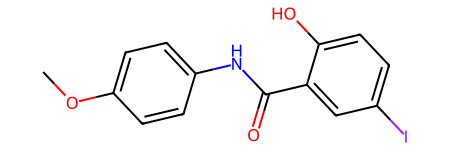

In [2]:
mol = Chem.MolFromSmiles('COc1ccc(NC(=O)c2cc(I)ccc2O)cc1')
mol

In [3]:
# BRICS decomposition. Returns a set of fragments.

frags = BRICS.BRICSDecompose(mol)
frags

{'[1*]C([6*])=O',
 '[16*]c1cc(I)ccc1O',
 '[16*]c1ccc([16*])cc1',
 '[3*]OC',
 '[5*]N[5*]'}

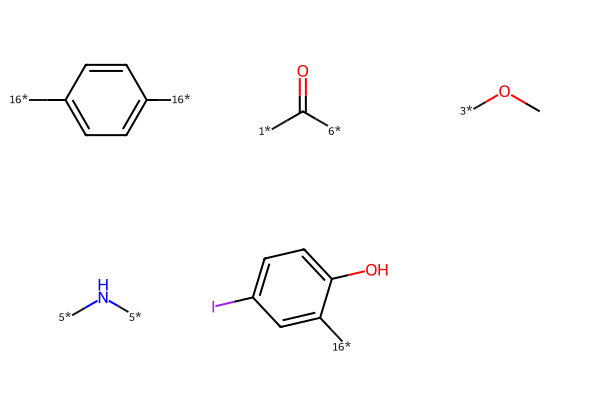

In [4]:
# Visualize how the fragmentation is done:

Draw.MolsToGridImage([Chem.MolFromSmiles(m) for m in frags])

One can also use ```BRICS.BreakBRICSBonds``` to fragment molecules. According to [Greg Landrum](https://gist.github.com/greglandrum/4076605), this is considerably faster

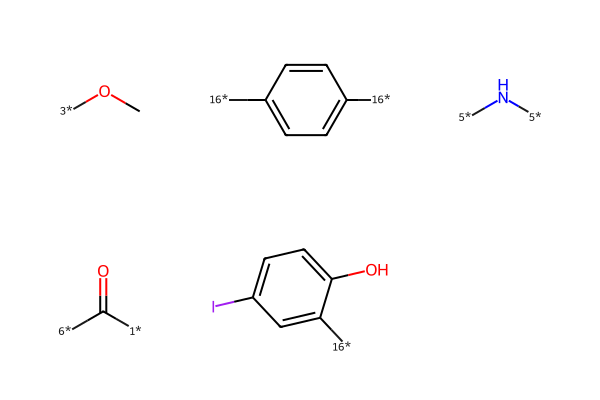

In [5]:
fragmented = BRICS.BreakBRICSBonds(mol)
pieces = Chem.GetMolFrags(fragmented,asMols=True)
Draw.MolsToGridImage(pieces)

## Build a fragment library by decomposing multiple molecules

In [6]:
# Consider a sample dataset of molecules:
df = pd.read_csv('data/CS12_combined.csv')
print(f"There are {df.shape[0]} molecules in this dataset")
df.head(3)

There are 999 molecules in this dataset


,ID,SMILES,QED,Retrosynthesis Score,Retrosynthesis Steps
0,1,CCCc1ncnc(-c2ccc(C(=O)N3CCN(C(C)CC)CC3)c(F)c2)...,0.511405,0.6,5.0
1,2,CCc1ncnc(-c2ccc(C(=O)N3CCN(C(C)C)CC3)c(F)c2)c1...,0.585936,0.2,2.0
2,3,CC(C)Cc1ncnc(-c2ccc(C(=O)N3CCN(C(C)C)CC3)c(F)c...,0.532574,0.6,7.0


In [7]:
#Frame an empty set to store all the fragments
all_frags = set()

for chunks in [Chem.MolFromSmiles(x) for x in df['SMILES']]:
    frags = BRICS.BRICSDecompose(chunks)
    all_frags.update(frags)
    
print(f"There are {len(all_frags)} fragments in the set \n")

#Print the set of fragments horizontally by converting it to a list
print(list(all_frags))

There are 140 fragments in the set 

['[1*]C(=O)CC(C)C', '[8*]C(C)CCC', '[5*]N1CCCC(C)C1C', '[5*]N1CCC(C)CC1C', '[5*]N1CCCC(N)CC1', '[4*]C1(C)CCN([5*])CC1', '[16*]c1cc(F)c([16*])c(F)c1', '[5*]N1CCCCC1', '[14*]c1ncc([16*])c(F)c1F', '[1*]C([1*])=O', '[8*]C(CC)CC', '[5*]N([5*])C', '[14*]c1ncc([16*])cc1F', '[5*]N1CCC(C)C(C)C1', '[8*]CC(C)(C)C', '[5*]N1CCCN([5*])CC1', '[8*]CC#CC', '[5*]N1CCCC(C)C(C)C1', '[5*]N1CCC([15*])CC1', '[4*]C(C)C', '[16*]c1cc(F)c([16*])cc1F', '[14*]c1ccc(C#Cc2c([14*])ncnc2[14*])cn1', '[1*]C(=O)C([4*])C', '[1*]C(=O)CCC', '[5*]N1CC(C)CC(C)(C)C1', '[5*]N1CCN2CCCCC2C1', '[8*]CCC(C)C', '[5*]N([5*])[5*]', '[5*]N1CCC([13*])N(C)CC1', '[4*]CCN', '[5*]N1CCCC([15*])C1C', '[8*]CC(C)CC', '[5*]N1CCN([5*])C(C)C1', '[8*]C(C)C(C)C', '[4*]C(CC)CC', '[5*]N1CC(C)CC(C)C1', '[5*]N1CCCCCC1C', '[8*]C(N)CN', '[4*]CC[8*]', '[5*]N1CCCCCC1', '[4*]CC([8*])C', '[5*]N1CCN([5*])CC1', '[8*]CCCN', '[5*]N1CC([15*])CC(C)C1', '[8*]CCCC', '[5*]N1CCN(C)CC1', '[16*]c1ccc([16*])c(C)c1C', '[4*]CCCC', '[5*]N1

In [8]:
len(set(all_frags))

140

These fragments can be written out to a text file to create a fragment database

## Build molecules by sampling fragments from a fragment library

First prepare a fragment library and store it in a list:

In [9]:
#prepare mol objects
molecules = [Chem.MolFromSmiles(m) for m in df['SMILES']]

#this time, store fragments in a list
decompose = [BRICS.BRICSDecompose(m) for m in molecules]

When stored in a list ```decompose```, each molecule's fragments are are stored as a tuple. The length of the set should be equal to the number of molecules, in this case 999

In [10]:
print(f"There are {len(decompose)} fragments in the set")

There are 999 fragments in the set


Here's what the list looks like for the first two molecules:

In [11]:
# Check fragments for the first two molecules
decompose[:2]

[{'[1*]C([6*])=O',
  '[14*]c1ncnc([14*])c1C#Cc1ccc(N)nc1',
  '[16*]c1ccc([16*])c(F)c1',
  '[4*]C(C)CC',
  '[5*]N1CCN([5*])CC1',
  '[8*]CCC'},
 {'[1*]C([6*])=O',
  '[14*]c1ncnc([14*])c1C#Cc1ccc(N)nc1',
  '[16*]c1ccc([16*])c(F)c1',
  '[4*]C(C)C',
  '[5*]N1CCN([5*])CC1',
  '[8*]CC'}]

In [12]:
# import the function to calculate the molecular similarity

from utils_pack.molecular_similarity import similarity

In [13]:
#Let's build molecules from the fragments of the first molecule:

first_mol_fragments = sorted(decompose[0])
print(first_mol_fragments) 

['[1*]C([6*])=O', '[14*]c1ncnc([14*])c1C#Cc1ccc(N)nc1', '[16*]c1ccc([16*])c(F)c1', '[4*]C(C)CC', '[5*]N1CCN([5*])CC1', '[8*]CCC']


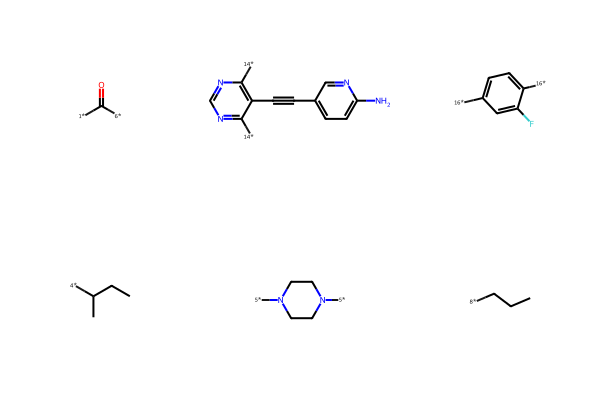

In [14]:
Draw.MolsToGridImage([Chem.MolFromSmiles(m) for m in first_mol_fragments])

These fragments are from the following molecule:

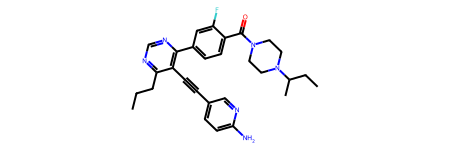

In [15]:
first_mol = df['SMILES'][0]
Chem.MolFromSmiles(first_mol)

Now, let's build random molecules using these fragments

In [16]:
fragms = [Chem.MolFromSmiles(x) for x in first_mol_fragments]
ms = BRICS.BRICSBuild(fragms)

#initialize the list to store the molecules
initial_molecules = []
final_molecules = []

In [17]:
for a,b in enumerate(ms):
    
    #store the initial molecules
    initial_molecules.append(Chem.MolToSmiles(b))
    
    #store those molecules that are similar to the first molecule in the dataframe
    if similarity(Chem.MolToSmiles(b), df['SMILES'][0]).tanimoto_similarity() > 0.7:
        final_molecules.append(Chem.MolToSmiles(b))

#Remove duplicates from the list by converting to sets:
initial_molecules = set(initial_molecules)
final_molecules = set(final_molecules)

print(f"There are {len(initial_molecules)} total molecules generated randomly")
print(f"There are {len(final_molecules)} final molecules \n")
print(f"They are: {final_molecules}")

There are 47 total molecules generated randomly
There are 4 final molecules 

They are: {'CCCc1ncnc(C(=O)N2CCN(C(C)CC)CC2)c1C#Cc1ccc(N)nc1', 'CCCc1ccc(-c2ncnc(N3CCN(C(C)CC)CC3)c2C#Cc2ccc(N)nc2)cc1F', 'CCCc1ncnc(-c2ccc(N3CCN(C(C)CC)CC3)cc2F)c1C#Cc1ccc(N)nc1', 'CCCc1ncnc(-c2ccc(N3CCN(C(C)CC)CC3)c(F)c2)c1C#Cc1ccc(N)nc1'}


As one can see, BRICS simply rearranges fragments based on those given to it:

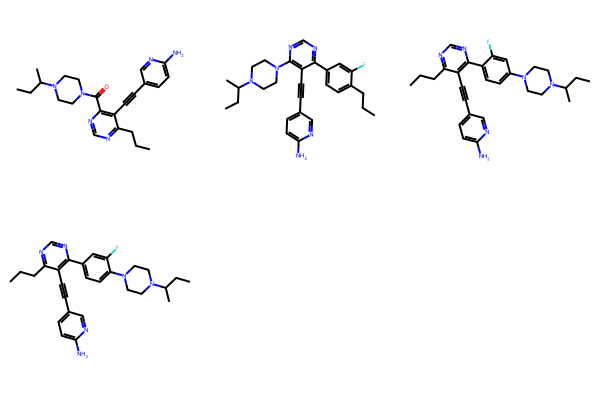

In [18]:
Draw.MolsToGridImage([Chem.MolFromSmiles(m) for m in final_molecules])

## Method 2: FragmentCatalog from RDKit

In [ ]:
# Set up the fragmenter:
from rdkit.Chem import FragmentCatalog

fName = os.path.join(RDConfig.RDDataDir,'FunctionalGroups.txt')
fparams = FragmentCatalog.FragCatParams(1,6,fName)

# Get the number of functional groups:
fparams.GetNumFuncGroups()
fcat=FragmentCatalog.FragCatalog(fparams)
fcgen=FragmentCatalog.FragCatGenerator()

In [ ]:
# Fragment the following molecules

m = Chem.MolFromSmiles('OCC=CC(=O)O')
print(fcgen.AddFragsFromMol(m,fcat))

3


In [ ]:
#Check what the fragments look like:

print(fcat.GetEntryDescription(0))
print(fcat.GetEntryDescription(1))
print(fcat.GetEntryDescription(2))

C<-O>C
C=C<-C(=O)O>
C<-C(=O)O>=CC<-O>


Notice that the entry descriptions include pieces in angular brackets (e.g. between ‘<’ and ‘>’). These describe the functional groups attached to the fragment. 

For example, in the above example, the catalog entry 0 corresponds to an ethyl fragment
with an alcohol attached to one of the carbons and entry 1 is an ethylene with a carboxylic acid on one carbon

This method generates too many and irrelevant fragments. 